In [48]:
import warnings

# Filter out DeprecationWarning related to should_run_async
warnings.filterwarnings("ignore", message="`should_run_async` will not call `transform_cell` automatically", category=DeprecationWarning)


In [49]:
#Importing necessarylibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [50]:
#importing the files
ideal_data=pd.read_csv("/content/Hackathon_Ideal_Data.csv")
mapping_file=pd.read_csv("/content/Hackathon_Mapping_File.csv")
validation_data=pd.read_csv("/content/Hackathon_Validation_Data.csv")
working_data=pd.read_csv("/content/Hackathon_Working_Data.csv")
sample_submission=pd.read_csv("/content/Sample Submission.csv")
print(ideal_data.head())
print(mapping_file.head())
print(working_data.head())
print(sample_submission.head())
#Display the dataset

  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  
              File N

In [51]:
#Handling missing data
print(ideal_data.isnull().sum())
is_any_missing_data=ideal_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)
ideal_data.dropna(axis=0, inplace=True)
ideal_data.dropna(axis=1, inplace=True)

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
Are there any missing values?
False


In [52]:
print(working_data.isnull().sum())
is_any_missing_data=working_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
Are there any missing values?
False


In [53]:
#Removing duplicates values
ideal_data.drop_duplicates(inplace=True)
ideal_data.duplicated().sum()

0

In [54]:
working_data.drop_duplicates(inplace=True)
working_data.duplicated().sum()

0

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

In [56]:
working_data=pd.read_csv("/content/Hackathon_Working_Data.csv")
print(working_data)

      MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2        

In [57]:
ideal_data=pd.read_csv("/content/Hackathon_Ideal_Data.csv")
print(ideal_data)

      MONTH STORECODE  QTY  VALUE                       GRP  \
0        M1        P1   25     83         HAIR CONDITIONERS   
1        M1        P1    6     22         HAIR CONDITIONERS   
2        M1        P1    4     15         HAIR CONDITIONERS   
3        M1        P1   15     60         HAIR CONDITIONERS   
4        M1        P2    0      0         HAIR CONDITIONERS   
...     ...       ...  ...    ...                       ...   
14255    M3       P10    0      0  SUGAR SUBSTITUTE (11/05)   
14256    M3        P8    1     62  SUGAR SUBSTITUTE (11/05)   
14257    M1        P6    0      0  SUGAR SUBSTITUTE (11/05)   
14258    M1       P10    0      0  SUGAR SUBSTITUTE (11/05)   
14259    M1        P8    1     62  SUGAR SUBSTITUTE (11/05)   

                        SGRP                  SSGRP  \
0          HAIR CONDITIONERS      HAIR CONDITIONERS   
1          HAIR CONDITIONERS      HAIR CONDITIONERS   
2          HAIR CONDITIONERS      HAIR CONDITIONERS   
3          HAIR CONDITI

In [58]:
#Data Processing And Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

In [59]:
# Data cleaning, normalization, and standardization
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns=working_data.select_dtypes(include=['int', 'float']).columns)

In [60]:
encoder = OneHotEncoder()
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical features
ideal_data_preprocessed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)

# Print preprocessed data
print("Ideal Data after preprocessing:")
print(ideal_data_preprocessed.head())
print("\nWorking Data after scaling:")
print(working_data_scaled.head())

Ideal Data after preprocessing:
    QTY  VALUE  MONTH_M1  MONTH_M2  MONTH_M3  STORECODE_P1  STORECODE_P10  \
0  25.0   83.0      True     False     False          True          False   
1   6.0   22.0      True     False     False          True          False   
2   4.0   15.0      True     False     False          True          False   
3  15.0   60.0      True     False     False          True          False   
4   0.0    0.0      True     False     False         False          False   

   STORECODE_P2  STORECODE_P3  STORECODE_P4  ...  BRD_ZANDU  BRD_ZANDU GEL  \
0         False         False         False  ...      False          False   
1         False         False         False  ...      False          False   
2         False         False         False  ...      False          False   
3         False         False         False  ...      False          False   
4          True         False         False  ...      False          False   

   BRD_ZANDU ULTRA POWER  BRD_ZATPAT

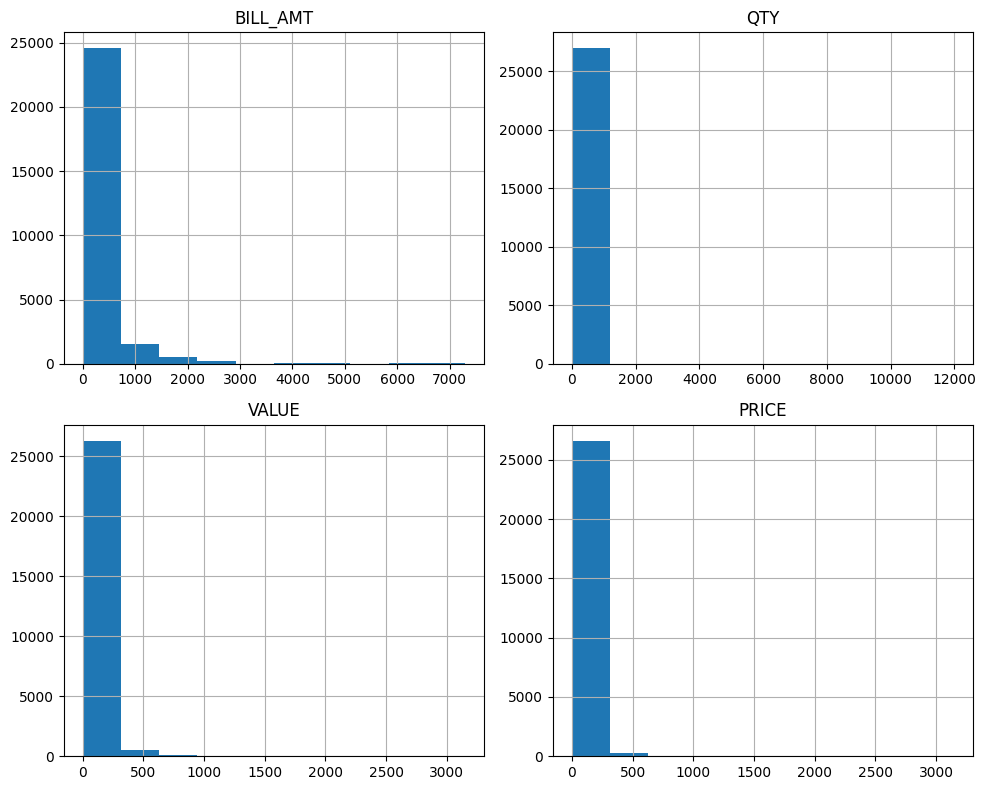

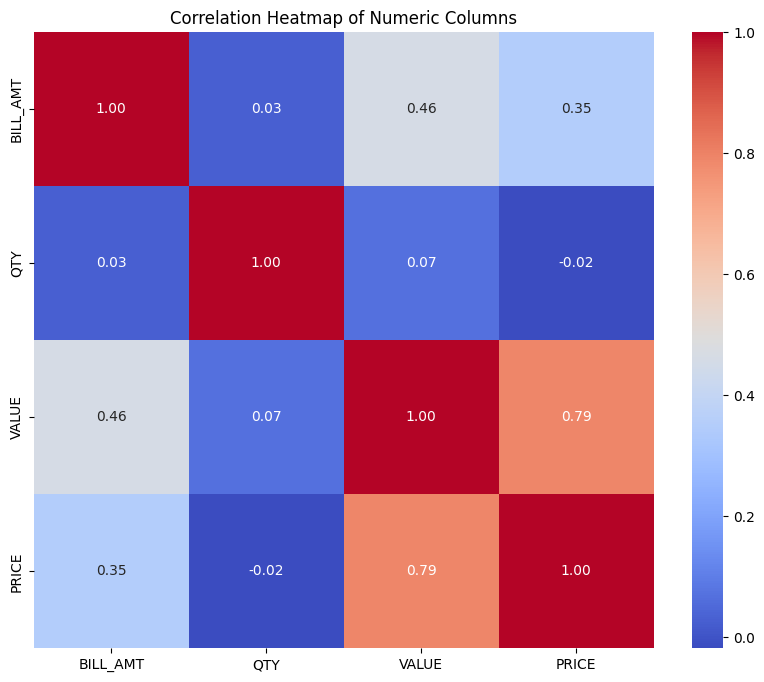

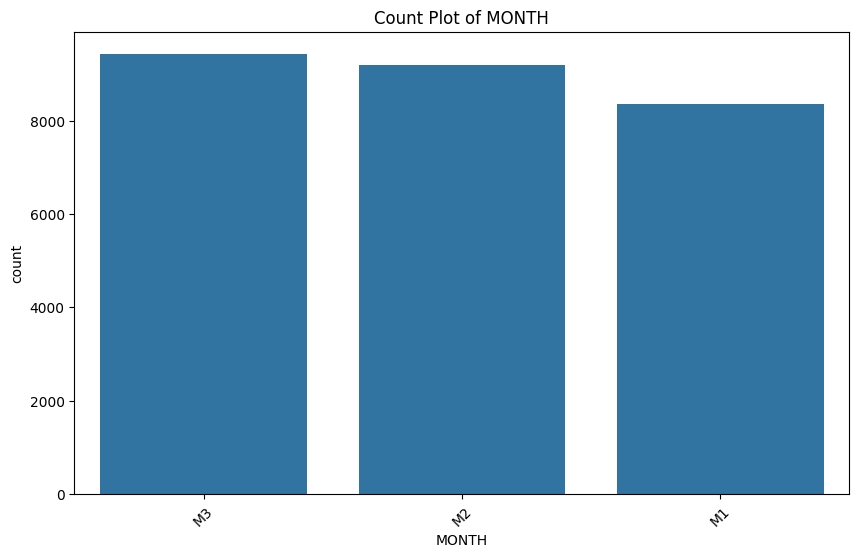

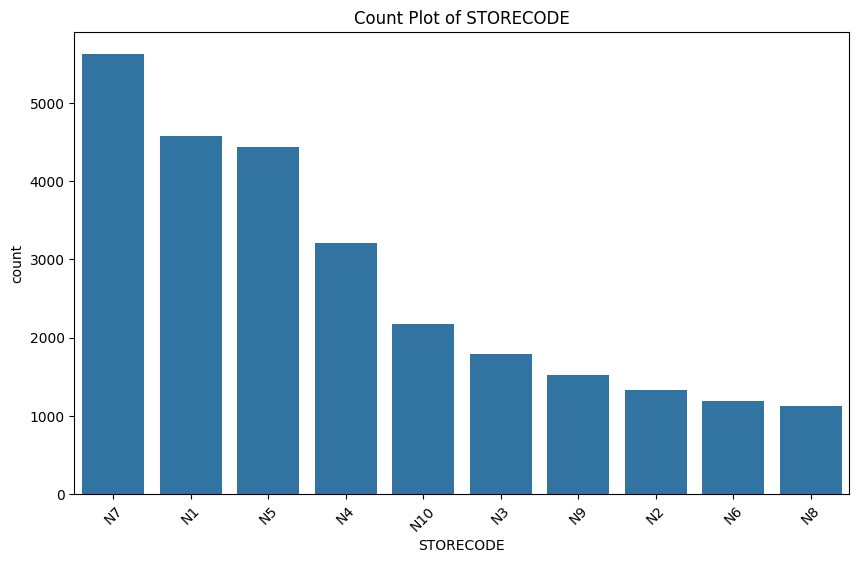

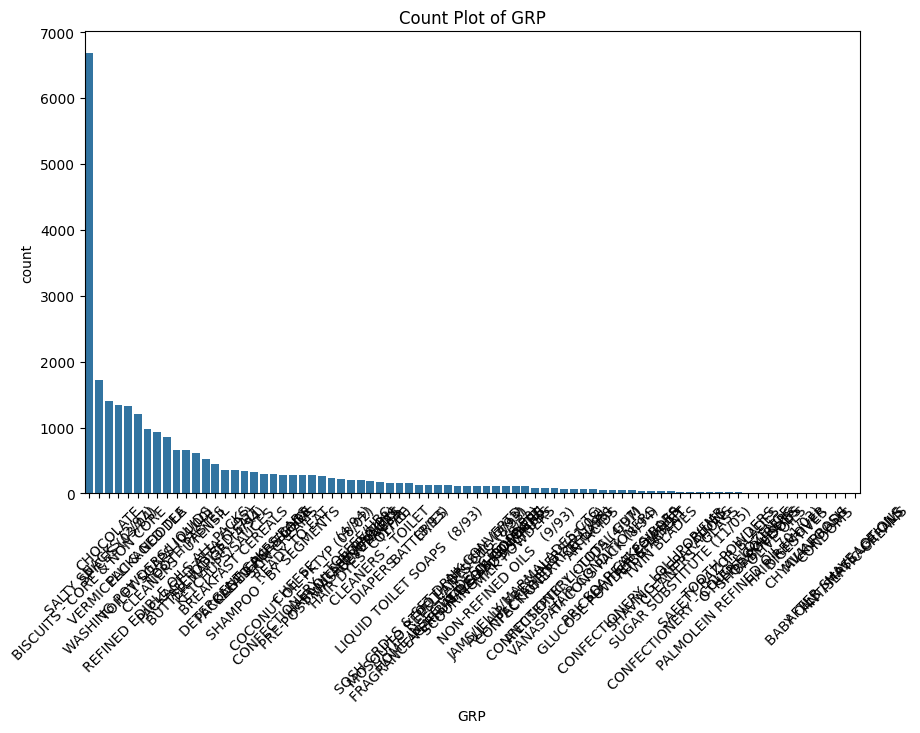

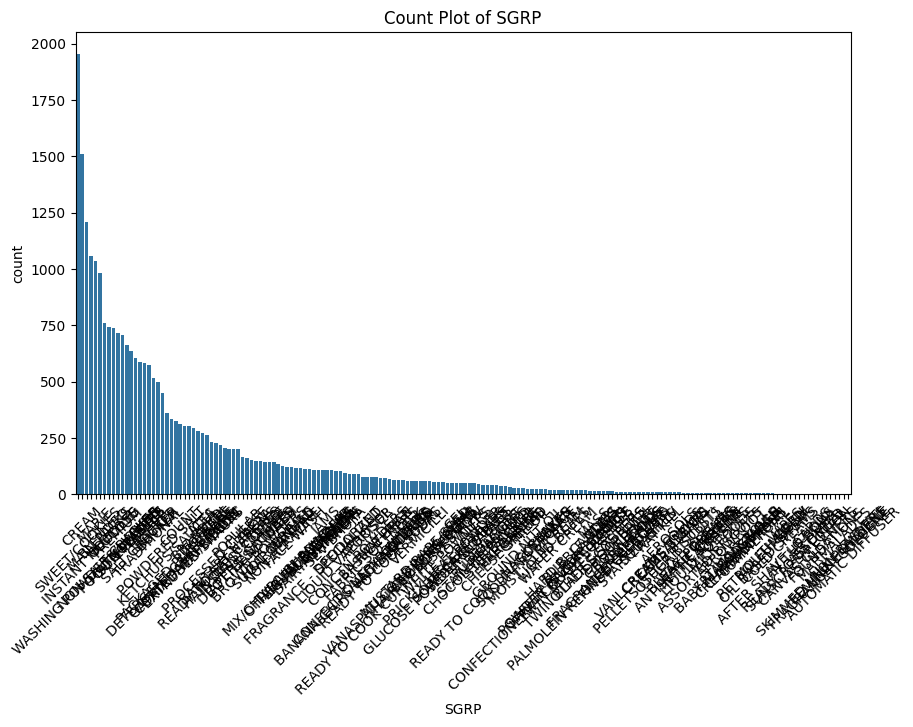

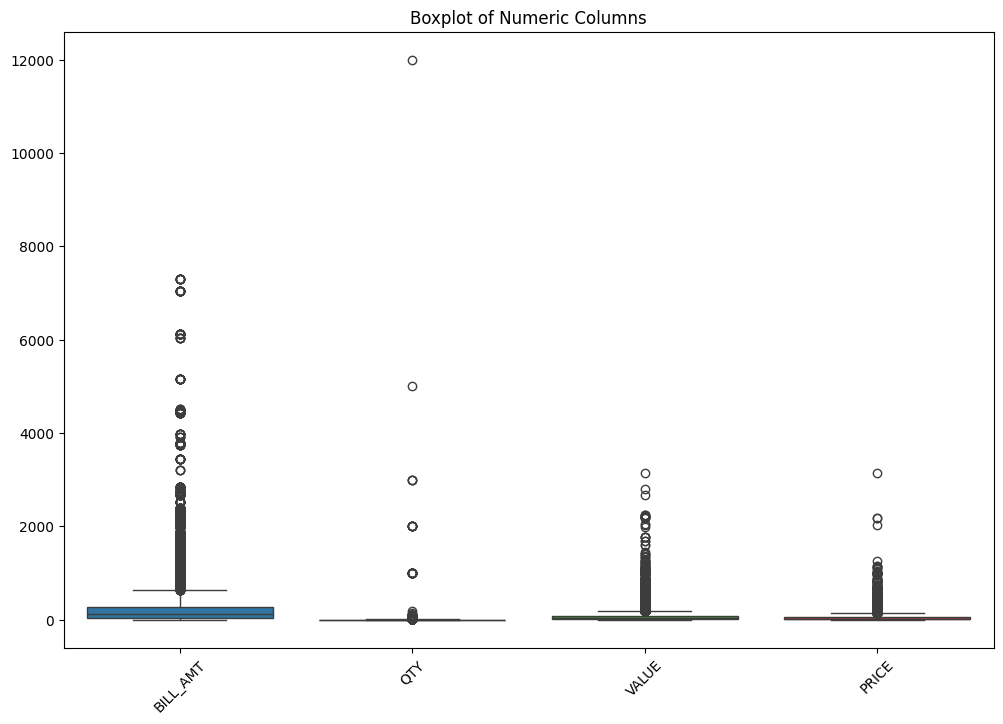

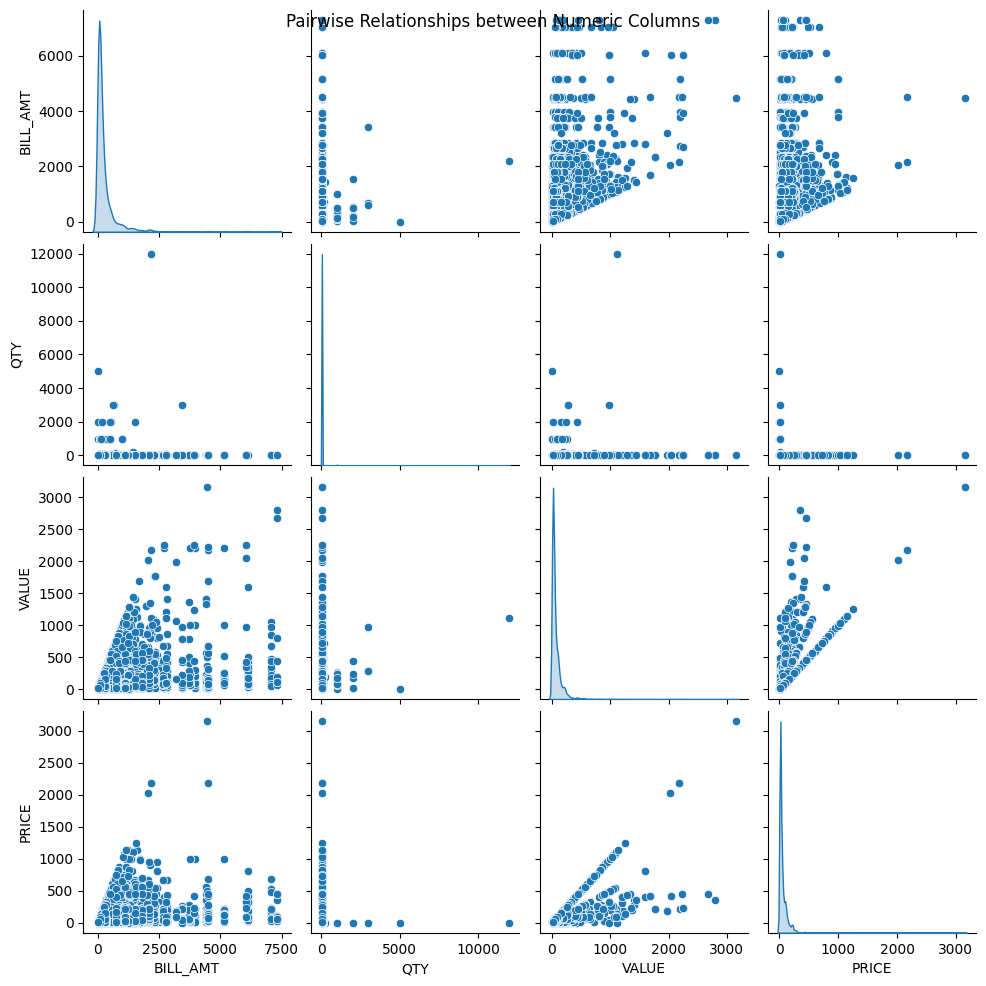

In [61]:
#Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
working_data = pd.read_csv("/content/Hackathon_Working_Data.csv")

# Plot the distribution of numeric columns
numeric_cols = ['BILL_AMT', 'QTY', 'VALUE', 'PRICE']
working_data[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot the correlation heatmap of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(working_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

# Plot count plots for categorical columns
categorical_cols = ['MONTH', 'STORECODE', 'GRP', 'SGRP']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=working_data, x=col, order=working_data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=working_data[numeric_cols])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# Plot scatter plots for pairwise relationships between numeric columns
sns.pairplot(working_data[numeric_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Numeric Columns')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

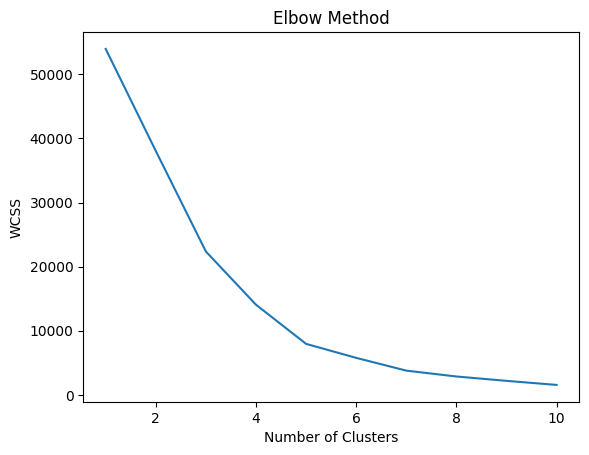

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


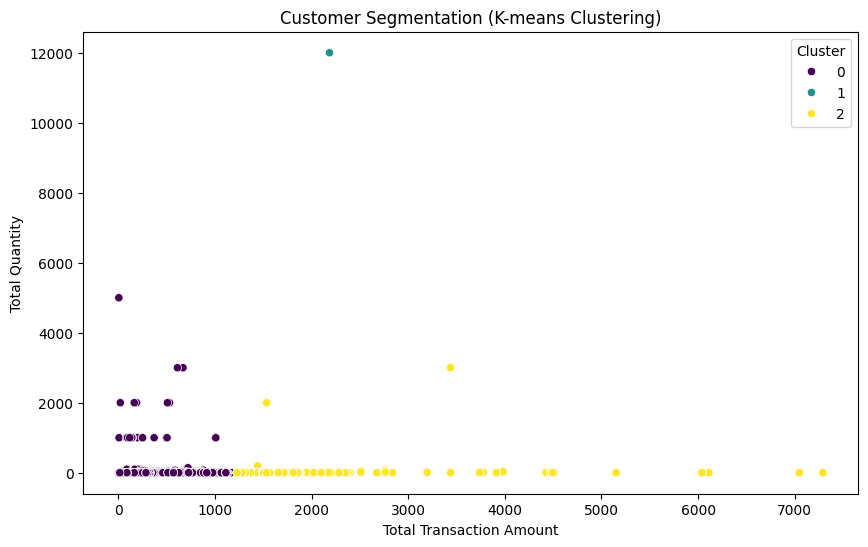

In [62]:
#Customer Segmentation with K-means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = working_data[['BILL_AMT', 'QTY']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
working_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data, x='BILL_AMT', y='QTY', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation (K-means Clustering)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()


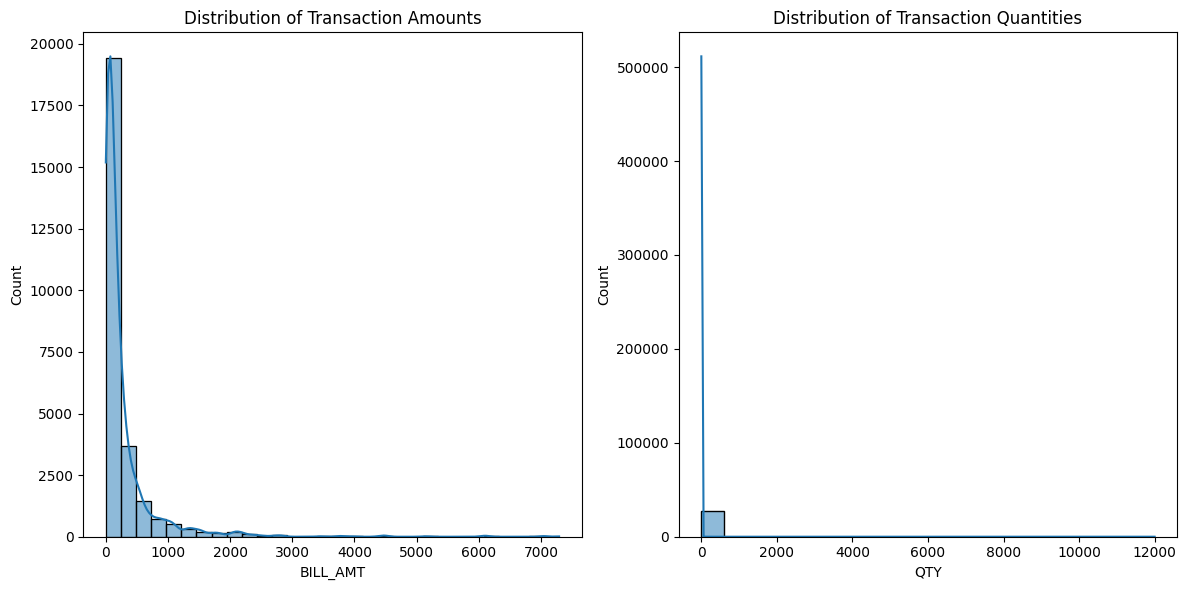

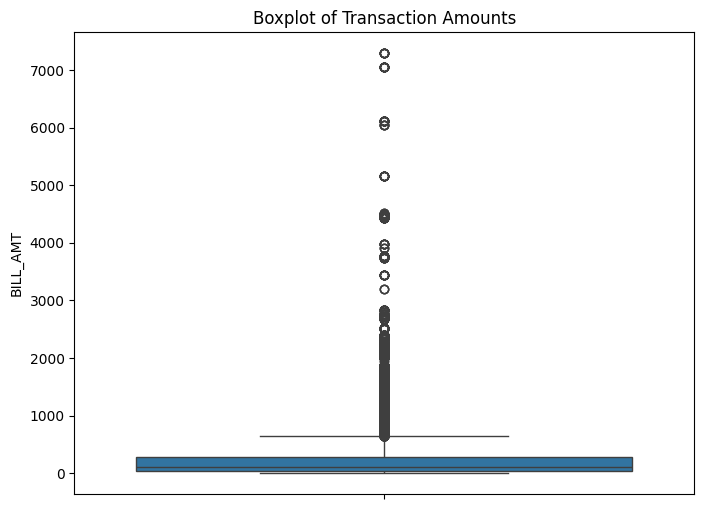

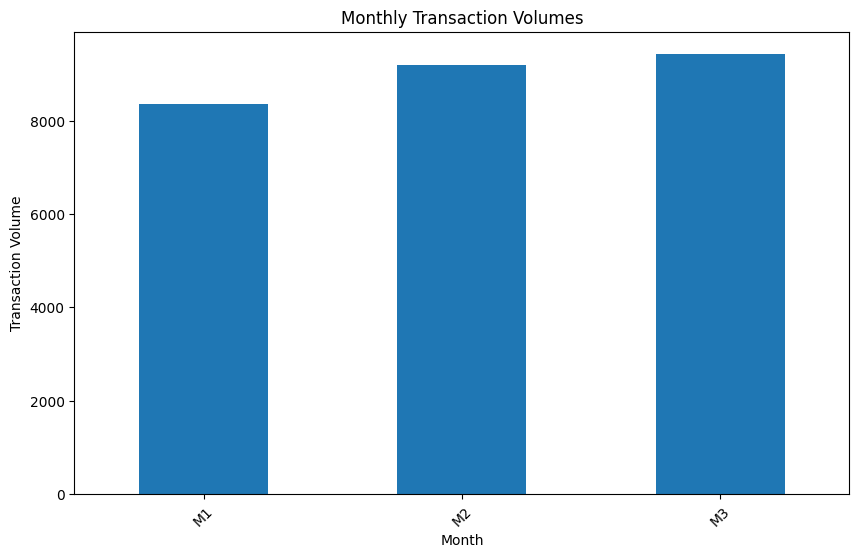

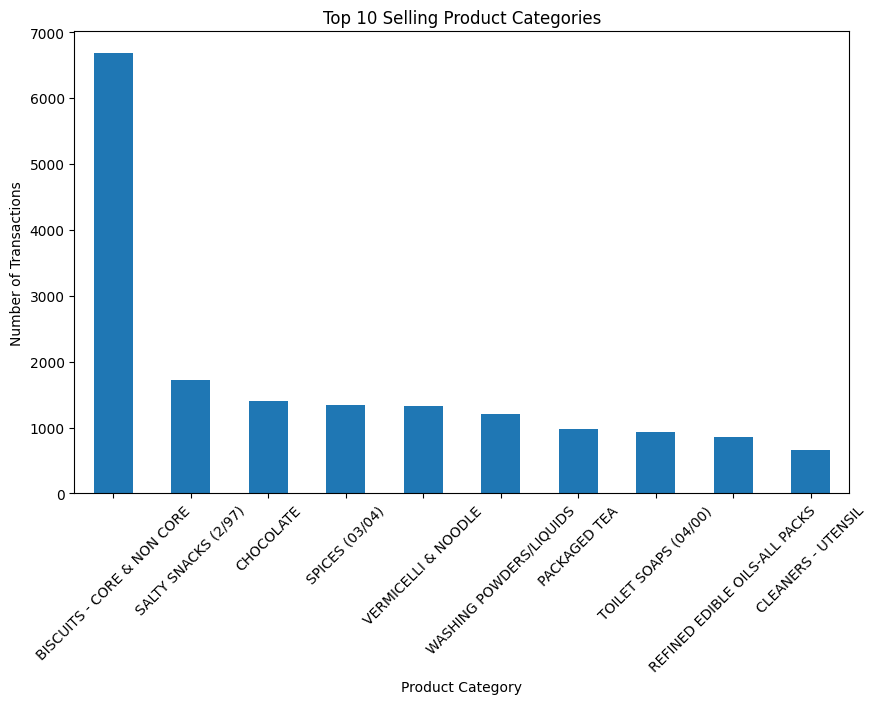

<ipython-input-63-fc78105cbf3b>:56: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rfm_data, x='Frequency', y='Monetary', palette='viridis')


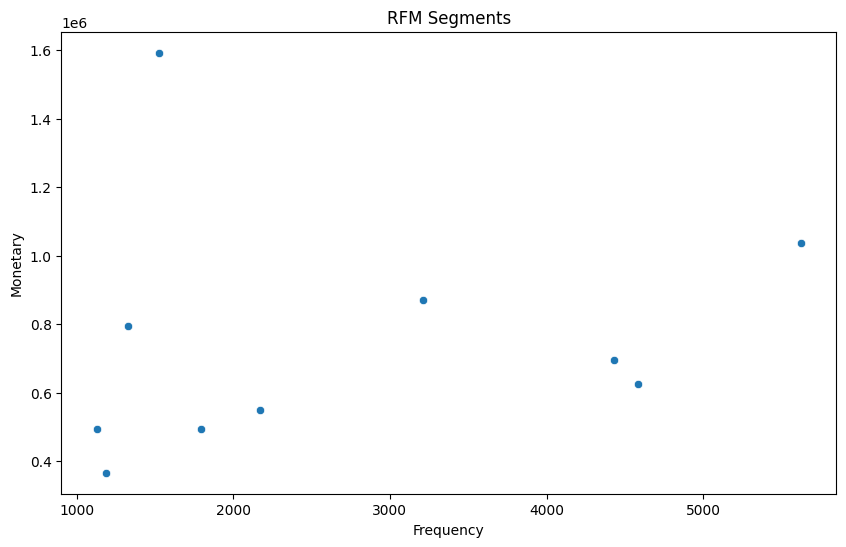

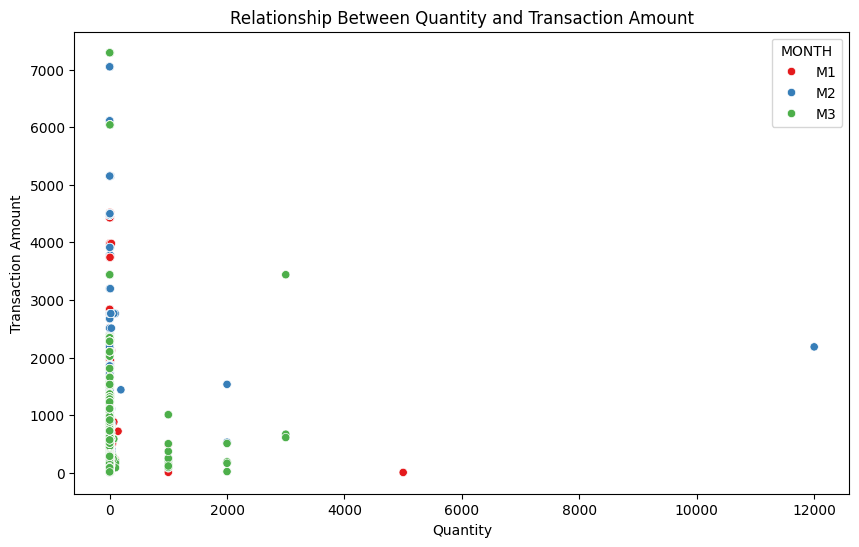

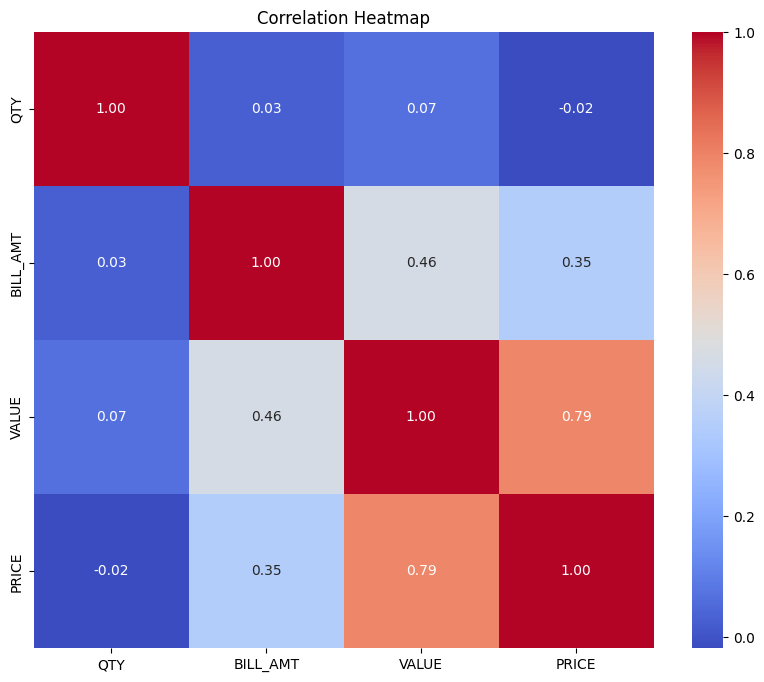

In [63]:
#Predictive Modeling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Hackathon_Working_Data.csv")
# Create histograms for transaction amounts and quantities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['BILL_AMT'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')

plt.subplot(1, 2, 2)
sns.histplot(data['QTY'], bins=20, kde=True)
plt.title('Distribution of Transaction Quantities')

plt.tight_layout()
plt.show()

# Box plot for transaction amounts
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BILL_AMT'])
plt.title('Boxplot of Transaction Amounts')
plt.show()
# Assuming 'MONTH' column represents the month
monthly_sales = data.groupby('MONTH').size()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Transaction Volumes')
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.xticks(rotation=45)
plt.show()
# Assuming 'GRP' column represents product categories
top_categories = data['GRP'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()
# Conduct RFM analysis or clustering techniques
# Here, we'll use RFM analysis as an example
# Assuming 'STORECODE' represents unique customers
rfm_data = data.groupby('STORECODE').agg({
    'BILL_ID': 'count',              # Frequency
    'BILL_AMT': 'sum',               # Monetary
}).rename(columns={'BILL_ID': 'Frequency', 'BILL_AMT': 'Monetary'})

# Visualize RFM segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Frequency', y='Monetary', palette='viridis')
plt.title('RFM Segments')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# Scatter plot to visualize relationship between quantity and transaction amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='QTY', y='BILL_AMT', hue='MONTH', palette='Set1')
plt.title('Relationship Between Quantity and Transaction Amount')
plt.xlabel('Quantity')
plt.ylabel('Transaction Amount')
plt.show()

# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[['QTY', 'BILL_AMT', 'VALUE', 'PRICE']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")
working_data = pd.read_csv("Hackathon_Working_Data.csv")

# Explore the structure of the datasets
print("Ideal Data Info:")
print(ideal_data.info())
print("\nWorking Data Info:")
print(working_data.info())



Ideal Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB
None

Working Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 

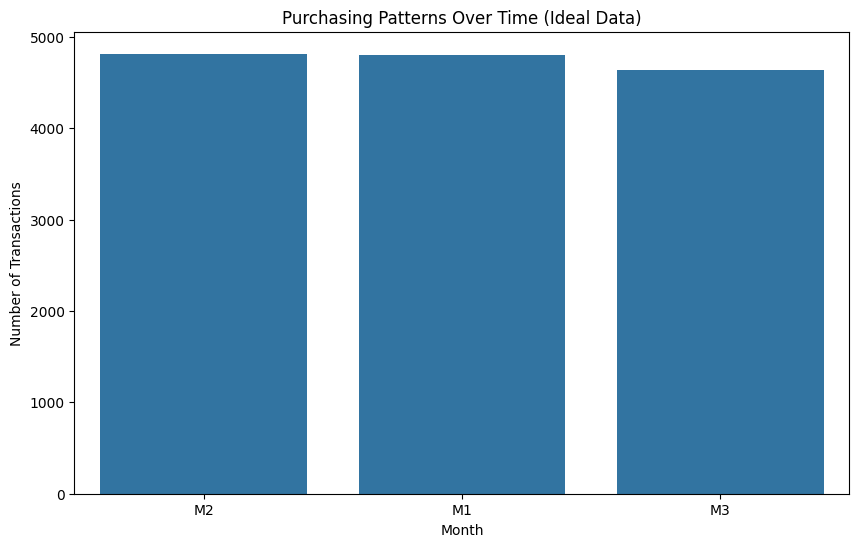

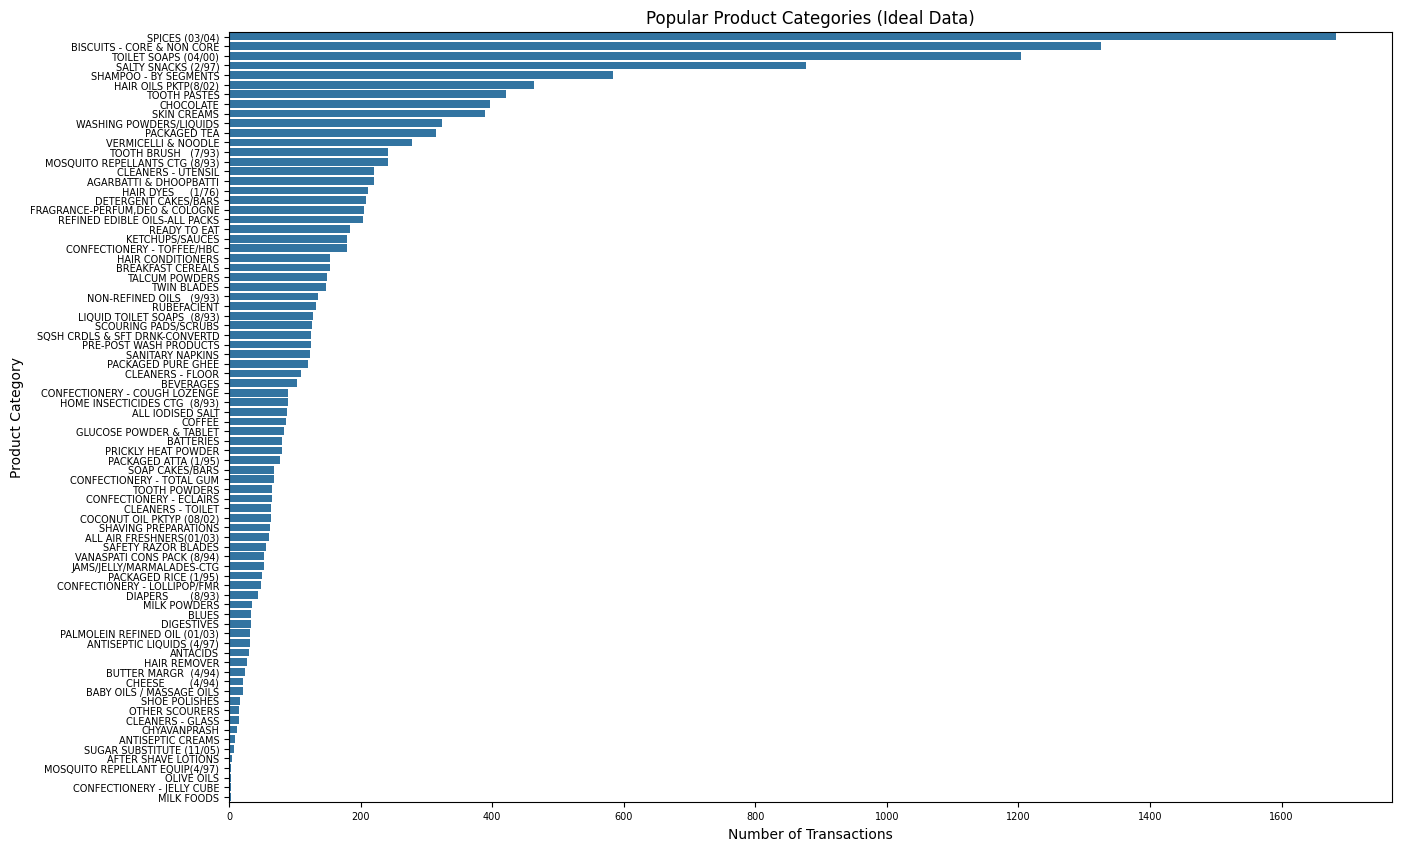

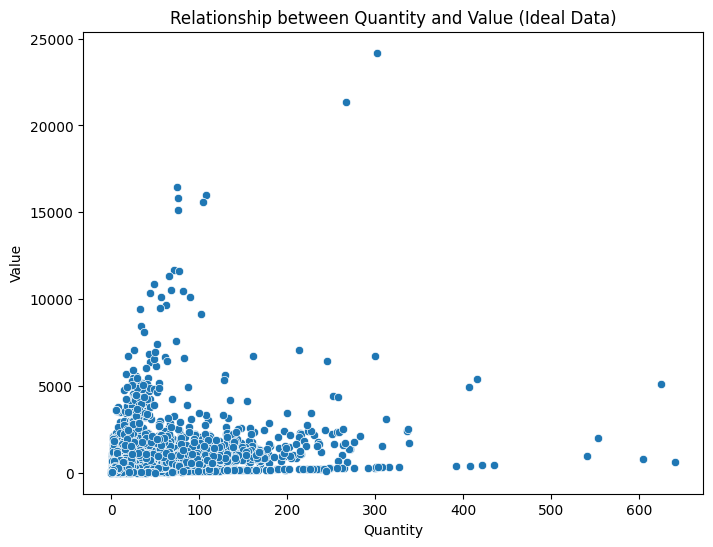

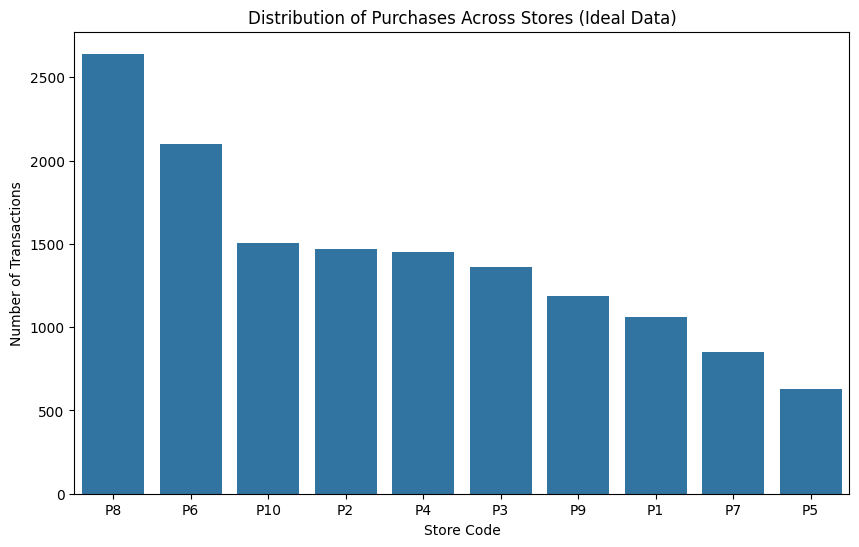

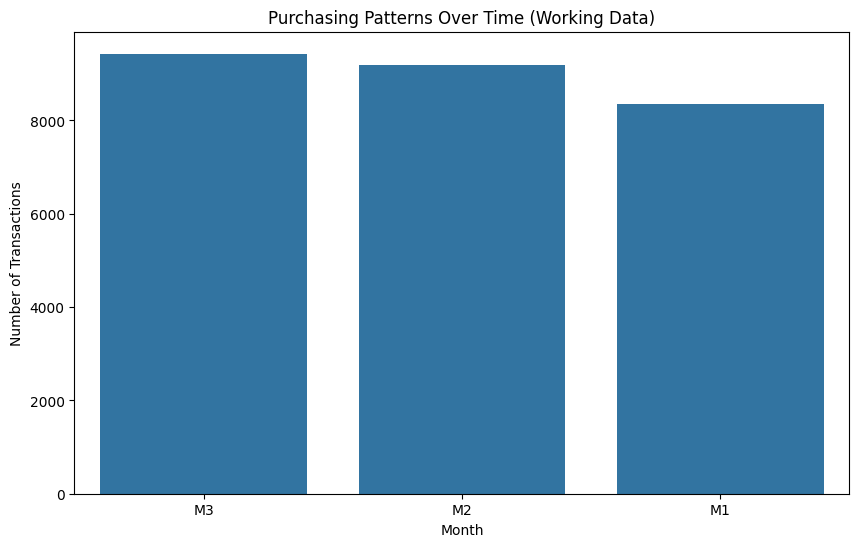

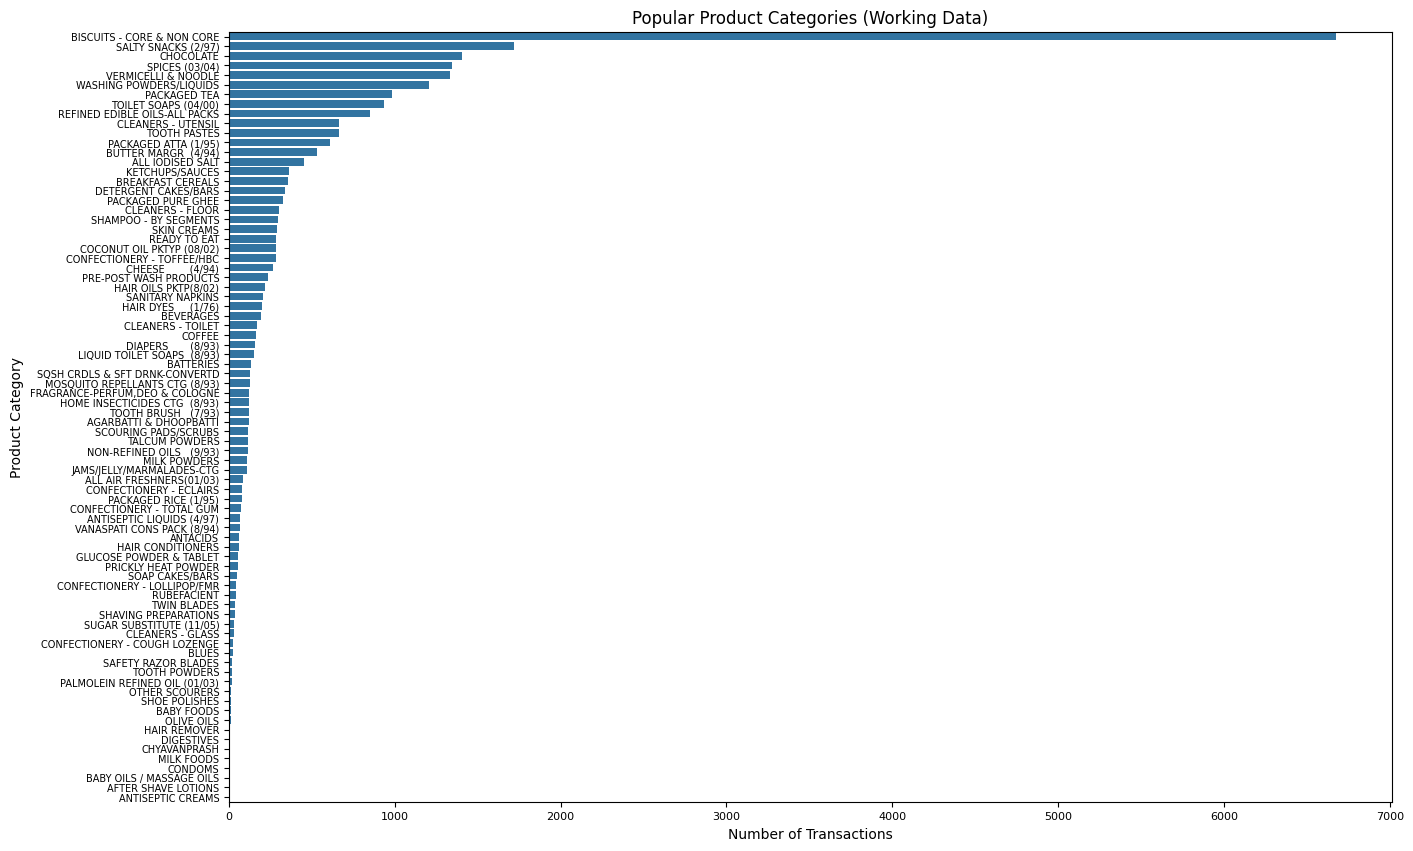

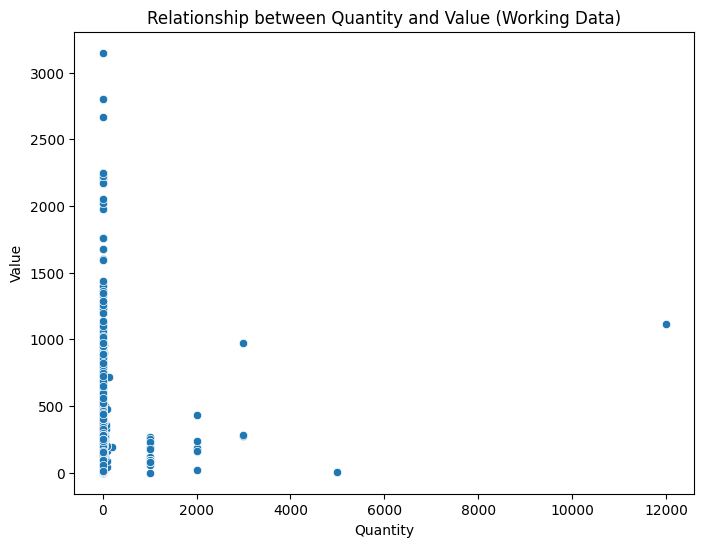

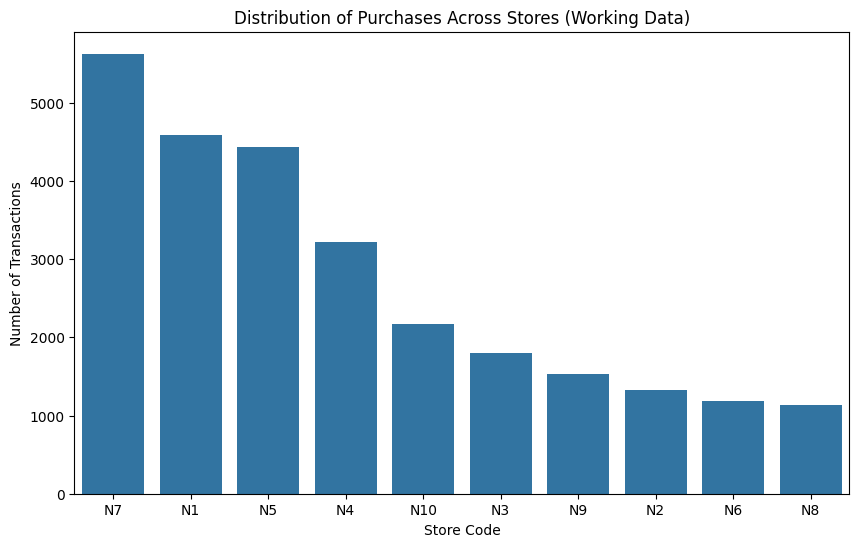

<ipython-input-65-4cb6cc8f68c8>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=working_data, x='DAY', y='BILL_AMT', hue='MONTH', ci=None)


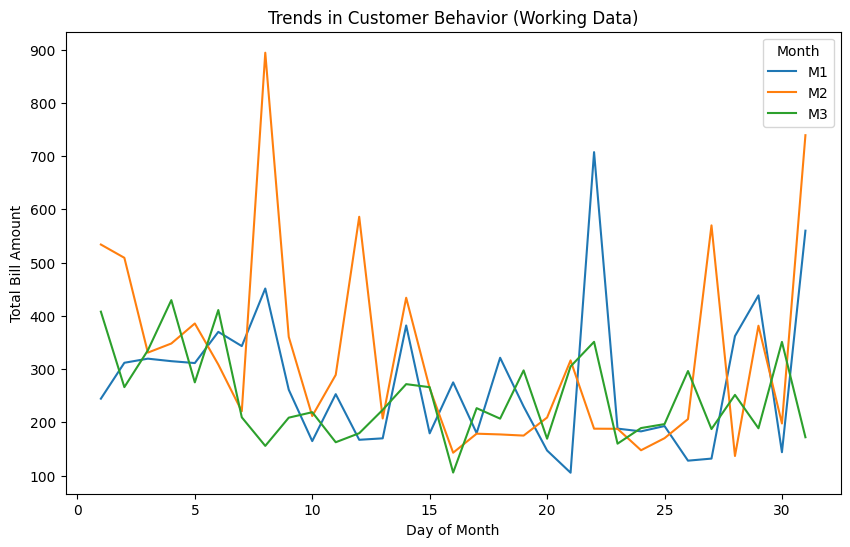

In [65]:
#Customer Behavior Analysis
# For ideal_data
# Analyze purchasing patterns over time
plt.figure(figsize=(10, 6))
sns.countplot(data=ideal_data, x='MONTH', order=ideal_data['MONTH'].value_counts().index)
plt.title('Purchasing Patterns Over Time (Ideal Data)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Identify popular product categories
plt.figure(figsize=(15, 10))
sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index)
plt.title('Popular Product Categories (Ideal Data)')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

# Explore the relationship between quantity and value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ideal_data, x='QTY', y='VALUE')
plt.title('Relationship between Quantity and Value (Ideal Data)')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

# Analyze the distribution of purchases across different stores
plt.figure(figsize=(10, 6))
sns.countplot(data=ideal_data, x='STORECODE', order=ideal_data['STORECODE'].value_counts().index)
plt.title('Distribution of Purchases Across Stores (Ideal Data)')
plt.xlabel('Store Code')
plt.ylabel('Number of Transactions')
plt.show()


# For working_data
# Analyze purchasing patterns over time
plt.figure(figsize=(10, 6))
sns.countplot(data=working_data, x='MONTH', order=working_data['MONTH'].value_counts().index)
plt.title('Purchasing Patterns Over Time (Working Data)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Identify popular product categories
plt.figure(figsize=(15, 10))
sns.countplot(data=working_data, y='GRP', order=working_data['GRP'].value_counts().index)
plt.title('Popular Product Categories (Working Data)')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.show()

# Explore the relationship between quantity and value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=working_data, x='QTY', y='VALUE')
plt.title('Relationship between Quantity and Value (Working Data)')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

# Analyze the distribution of purchases across different stores
plt.figure(figsize=(10, 6))
sns.countplot(data=working_data, x='STORECODE', order=working_data['STORECODE'].value_counts().index)
plt.title('Distribution of Purchases Across Stores (Working Data)')
plt.xlabel('Store Code')
plt.ylabel('Number of Transactions')
plt.show()

# Investigate any trends or seasonality in customer behavior
plt.figure(figsize=(10, 6))
sns.lineplot(data=working_data, x='DAY', y='BILL_AMT', hue='MONTH', ci=None)
plt.title('Trends in Customer Behavior (Working Data)')
plt.xlabel('Day of Month')
plt.ylabel('Total Bill Amount')
plt.legend(title='Month')
plt.show()


<ipython-input-66-6251a8eb474d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=working_data, x='DAY', y='BILL_AMT', hue='MONTH', ci=None)


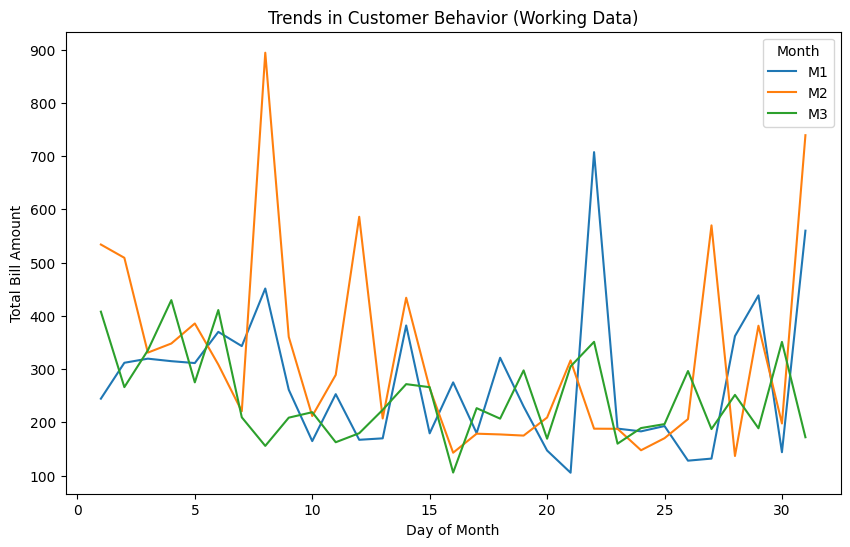

In [66]:
#Visualization and Reporting:
plt.figure(figsize=(10, 6))
sns.lineplot(data=working_data, x='DAY', y='BILL_AMT', hue='MONTH', ci=None)
plt.title('Trends in Customer Behavior (Working Data)')
plt.xlabel('Day of Month')
plt.ylabel('Total Bill Amount')
plt.legend(title='Month')
plt.show()